In [2]:
#mengimport library-lobary yang akan digunakan dalam program dan ada yang diberikan nama alias dengan keyword as untuk penyingkatan penulisan
import cv2
import numpy
import matplotlib.pyplot as plt

In [3]:
#tampilkan hasil 2 gambar
def show_img2(w, h, citra1, citra2, caption1, caption2):  
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-1
    plt.subplot(1,2,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=10, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra1, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(1,2,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra2, cmap="gray")
    
#tampilkan hasil 1 gambar dan histogramnnya
def show_img_hist(w, h, citra1, histogram, caption1, caption2): 
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-1
    plt.subplot(1,2,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=10, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra1, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(1,2,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=10, color="green")
    #membuat perluangan dari 0 hingga 256
    canvas = [i for i in range(256)]  
    #menampilkan histrogram
    plt.bar(canvas, histogram)
    
#tampilkan hasil 2 histogram
def show_2_hist(w, h, histogram1, histogram2, caption1, caption2): 
    #membuat perluangan dari 0 hingga 256
    canvas = [i for i in range(256)] 
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h  
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-1
    plt.subplot(1,2,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=10, color="green")
    #menampilkan histrogram
    plt.bar(canvas, histogram1)
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(1,2,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=10, color="green")
    #menampilkan histrogram
    plt.bar(canvas, histogram2)

In [4]:
#mengimport gambar dengan matplotlib untuk menampilkan gambar asli (RGB) tanpa ada pengaruh gambar lain
miguel_plt = plt.imread('miguel.jpg')

#mengimport gambar dengan cv2 untuk dilakukan konversi ke gray image
miguel_cv2 = cv2.imread('miguel.jpg')

#mengkonversi gambar miguel_cv2 ke gray image dan ditampung di miguel_gray
miguel_gray = cv2.cvtColor(miguel_cv2, cv2.COLOR_BGR2GRAY)

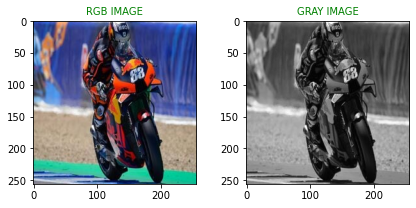

In [5]:
#menampilkan original image dan gray image
show_img2(7, 3, miguel_plt, miguel_gray, "RGB IMAGE", "GRAY IMAGE")

In [6]:
#menampilkan dimensi dari gambar
print("Dimensi gambar miguel : ", miguel_gray.shape)

Dimensi gambar miguel :  (256, 256)


In [7]:
# Mencari nilai histogram dengan dibuatkan fungsi
def histogram(citra):
    histogram_value = numpy.zeros(256).astype(int)
    h,w = citra.shape
    for i in range(h):
        for j in range(w):
            histogram_value[ citra[i,j] ] += 1
    return histogram_value

# 1. HISTOGRAM GAMBAR MIGUEL

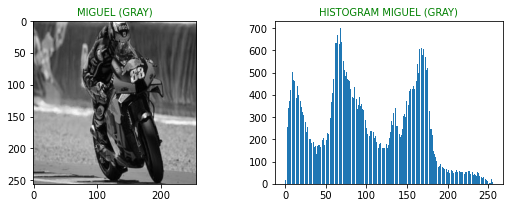

In [8]:
#menyimpan hasil perhitungan histogram dari gambar miguel_gray ke variabel histogram_miguel
histogram_miguel = histogram(miguel_gray)

#menampilkan gambar dan historgramnnya
show_img_hist(9, 3, miguel_gray, histogram_miguel, "MIGUEL (GRAY)", "HISTOGRAM MIGUEL (GRAY)")

# 2. EKUALISASI HISTOGRAM

In [9]:
#membuat canvas hitam dengan fungsi zeros yang berukuran 256
canvas_equ = numpy.zeros(256).astype(int)

#mengambil dimensi tinggi dan lebar dari gambar
h, w = miguel_gray.shape

In [28]:
print(h,w)

256 256


In [10]:
#cari nilai histogram
for i in range(h ):
    for j in range(w):
        canvas_equ[miguel_gray[i,j]] +=1

#cari nilai sk (histogram kumulatif)
sk = numpy.zeros(256).astype(int)
for i in range(256):
    sk[i] = numpy.sum( canvas_equ[0:i+1] )

#cari nilai target sk yang akan diequalisasi
target_value = sk*(256-1)/(h*w)
target_value = numpy.floor(target_value).astype(int)

#menampung hasil equalisasi
result_equ = numpy.zeros(miguel_gray.shape)
for i in range(h):
    for j in range(w):
        result_equ[i, j] = target_value[miguel_gray[i,j]]

In [11]:
#menampung hasil equalisasi di variabel miguel_after_equ
miguel_after_equ = result_equ.astype(int)

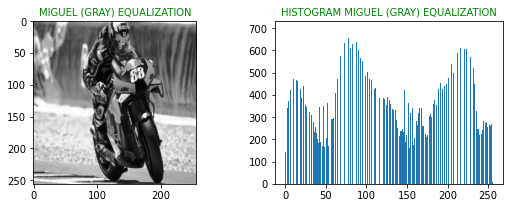

In [12]:
#mencari histogram dari gambar hasil equalisasi
miguel_after_equ_hist = histogram(miguel_after_equ)

#menampilkan gambar dan histogramnya hasil dari equalisasi
show_img_hist(9, 3, miguel_after_equ, miguel_after_equ_hist, "MIGUEL (GRAY) EQUALIZATION", "HISTOGRAM MIGUEL (GRAY) EQUALIZATION")

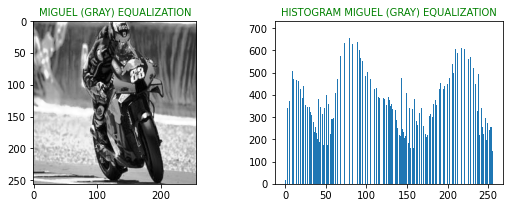

In [13]:
#mencoba equalisasi menggunakan library cv2 dengan fungsi equalizeHist sebagai perbandingan
miguel_library_equ = cv2.equalizeHist(miguel_gray)

#mencari histogram dari gambar hasil equalisasi dengan library
miguel_library_equ_hist = histogram(miguel_library_equ)

#menampilkan gambar dan histogramnya hasil dari equalisasi dengan menggunakan library
show_img_hist(9, 3,miguel_library_equ, miguel_library_equ_hist, "MIGUEL (GRAY) EQUALIZATION", "HISTOGRAM MIGUEL (GRAY) EQUALIZATION")

# 3. SPESIFIKASI 

In [14]:
#mengimport gambar dengan matplotlib untuk menampilkan gambar asli (RGB) tanpa ada pengaruh gambar lain
kevin_plt = plt.imread('kevin.jpg')
#mengimport gambar dengan cv2 untuk dilakukan konversi ke gray image
kevin_cv2 = cv2.imread('kevin.jpg')

#mengkonversi gambar miguel_cv2 ke gray image dan ditampung di kevin_gray
kevin_gray = cv2.cvtColor(kevin_cv2, cv2.COLOR_BGR2GRAY)

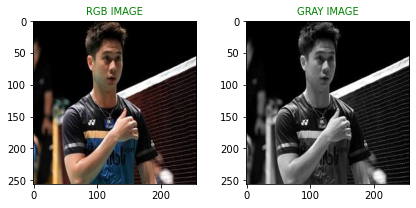

In [15]:
#menampilkan original image dan gray image
show_img2(7, 3, kevin_plt, kevin_gray, "RGB IMAGE", "GRAY IMAGE")

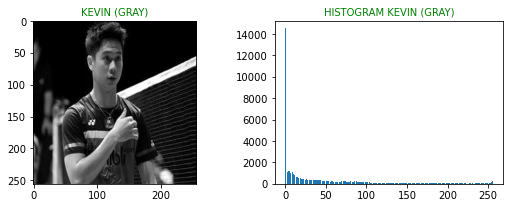

In [16]:
#menyimpan hasil perhitungan histogram dari gambar kevin_gray ke variabel histogram_kevin
histogram_kevin = histogram(kevin_gray)

show_img_hist(9, 3, kevin_gray, histogram_kevin, "KEVIN (GRAY)", "HISTOGRAM KEVIN (GRAY)")

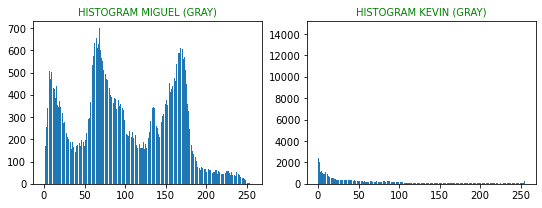

In [17]:
#membandingkan histogram miguel dan kevin
show_2_hist(9, 3, histogram_miguel, histogram_kevin, "HISTOGRAM MIGUEL (GRAY)", "HISTOGRAM KEVIN (GRAY)")

In [18]:
#fungsi matching_target berikut berfungsi untuk mencari distribusi level keabuan
#pada suatu citra
def matching_target(citra, level):
    
    #membuat canvas hitam dengan fungsi zeros yang berukuran 256 yang bertipe int
    canvas_spek = numpy.zeros(level).astype(int)
    #mengambil dimensi tinggi dan lebar dari parameter citra
    h, w = citra.shape

    #cari nilai histogram
    for i in range(h):
        for j in range(w):
            canvas_spek[citra[i,j]] +=1

    #cari nilai sk (histogram kumulatif)
    sk = numpy.zeros(level).astype(int)
    for i in range(level):
        sk[i] = numpy.sum( canvas_spek[0:i+1] )

    #cari nilai target sk yang akan diequalisasi
    target_value = sk*(level-1)/(h*w)
    target_value = numpy.floor(target_value).astype(int)

    
    return target_value

In [19]:
#mengambil nilai nearest gray dari citra kevin dan citra miguel
#dimana nanti nilai nearest gray dari citra kevin akan menjadi nilai pada citra miguel
target_miguel = matching_target(miguel_gray, 256)
target_kevin = matching_target(kevin_gray, 256)

In [20]:
#mengambil nilai dari value_asal untuk dicarikan nilai terdekatnya dari nilai target dan
#kemudian mencari jumlah gray level sebanyak nilai tersebut 
def matching_color(value_asal, target):
    selisih = abs(value_asal-target[0])
    min = 0
    for i in range(len(target)):
        cheking = abs(value_asal-target[i])
        if(selisih > cheking):
            selisih = cheking
            min = i
    return min

In [21]:
#membuat canvas hitam bernilai 0 dengan ukuran 256
canvas_spek = numpy.zeros(256, dtype=int)
#mencari nilai pendekatan dari nilai gambar kevin ke nilai gambar miguel kemudian disimpan pada varibar canvas_spek
for i in range(256):
    canvas_spek[i] = matching_color(target_miguel[i], target_kevin)

In [22]:
#menampilkan nilai pada canvas_spek
canvas_spek

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   3,
         3,   3,   4,   5,   5,   6,   7,   7,   8,   8,   9,   9,   9,
        10,  11,  11,  11,  12,  12,  13,  14,  14,  15,  15,  16,  17,
        17,  18,  19,  19,  20,  21,  22,  23,  24,  24,  25,  25,  26,
        26,  27,  28,  28,  29,  30,  30,  30,  31,  32,  33,  33,  33,
        34,  34,  35,  35,  35,  36,  37,  37,  37,  37,  38,  39,  39,
        40,  41,  42,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  61,  62,  64,  66,  67,  70,  72,
        73,  75,  78,  80,  82,  84,  86,  89,  91,  94,  98, 102, 105,
       113, 117, 122, 128, 139, 146, 151, 155, 163, 167, 172, 17

In [23]:
#membuat canvas hitam baru bernilai 0 dengan ukuran mengikuti nilai miguel_gray
miguel_spek = numpy.zeros(miguel_gray.shape).astype(int)
#melakukan perulungan terhadap matriks gambar miguel_gray yang berukuran 256
for i in range(miguel_gray.shape[0]):
  for j in range(miguel_gray.shape[1]):
    #menyimpan nilai pada canvas_spek mengikuti nilai pada gambar miguel_gray dengan indeks i dan j
    miguel_spek[i, j] = canvas_spek[miguel_gray[i, j]]

miguel_spek

array([[ 10,  11,  14, ..., 252, 252, 252],
       [  9,  10,  12, ..., 252, 252, 252],
       [  8,   9,  11, ..., 249, 249, 249],
       ...,
       [ 42,  42,  41, ...,  39,  39,  40],
       [ 41,  40,  41, ...,  39,  40,  40],
       [ 42,  41,  42, ...,  42,  42,  42]])

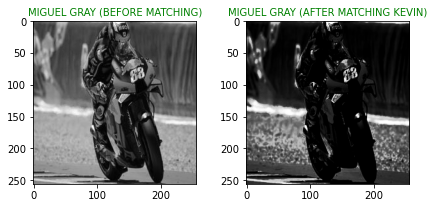

In [24]:
#menampilkan gambar seblum dan gambar sesudah spesifikasi
show_img2(7, 3, miguel_gray, miguel_spek, "MIGUEL GRAY (BEFORE MATCHING)", "MIGUEL GRAY (AFTER MATCHING KEVIN)")

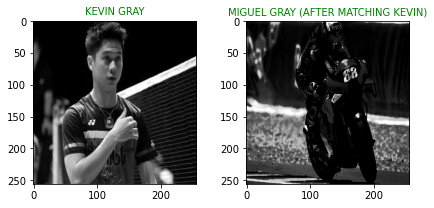

In [25]:
#menampilkan gambar seblum dan gambar sesudah spesifikasi
show_img2(7, 3, kevin_gray, miguel_spek, "KEVIN GRAY", "MIGUEL GRAY (AFTER MATCHING KEVIN)")

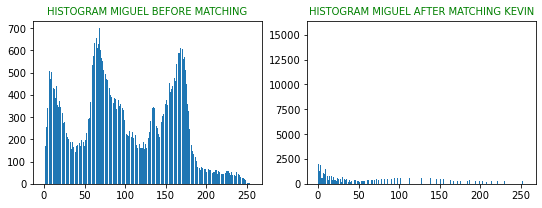

In [26]:
#menyimpan hasil perhitungan histogram dari gambar miguel_spek ke variabel histogram_miguel_spek
histogram_miguel_spek = histogram(miguel_spek)

#membandingkan histogram miguel dan kevin
show_2_hist(9, 3, histogram_miguel, histogram_miguel_spek, "HISTOGRAM MIGUEL BEFORE MATCHING", "HISTOGRAM MIGUEL AFTER MATCHING KEVIN")

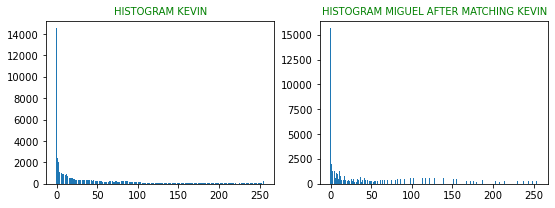

In [27]:
#membandingkan histogram miguel dan kevin
show_2_hist(9, 3, histogram_kevin, histogram_miguel_spek, "HISTOGRAM KEVIN", "HISTOGRAM MIGUEL AFTER MATCHING KEVIN")